# <h2 style="font-size: 44px;" align = center>**Plant Disease Detection Using Resnet And CNN**</h2>

## Importing Libraries 

In [13]:
# from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
#Downloading dataset
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

In [14]:
#Locally Importing Dataset
train ='C:/Users/abhyu/Documents/TF/dataset/train'
validation_dir = 'C:/Users/abhyu/Documents/TF/dataset/valid'

In [15]:
#Function to get files from directory
import glob
from tqdm import tqdm
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in tqdm(os.walk(directory)):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [16]:
#Training Sample
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))

print(num_classes,"Classes")
print(train_samples,"Train images")

39it [00:00, 92.70it/s] 

38 Classes
70295 Train images


In [17]:
#Validation Sample
valid_samples=get_files(validation_dir)
print(valid_samples,"Validation images")

39it [00:00, 327.83it/s]

17572 Validation images


In [10]:
#ImageDataGenerator For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True) #Augmenting Training Data
test_datagen=ImageDataGenerator(rescale=1./255) #Only Rescaling Validation Data
img_width,img_height =128,128 
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(validation_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size) #Generation Of Augmented Data Batches

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#Downloading InceptionResNetV2
#od.download('https://www.kaggle.com/datasets/keras/inceptionresnetv2')

## Defining Neural Network Structure

The code in the following few cells has been commented out in order to not run any of these cells by mistake. This is because the model invokes ResNet50 Architecture and has a large number of hidden layers. This makes it complicated, which in turn increases the requirements to train the model. For example, memory requirements to train the model are upwards of 7 GBs of memory paired up with atleast 15 GBs of Nvidia V100 GPU Vram. In addition to this, it requires around 8 non-idle hours.

In [11]:
# from keras import Model
# from keras import optimizers
# import tensorflow as tf
# from keras.optimizers import Adam
# from keras.models import Sequential
# from keras.layers import GlobalAveragePooling2D,Dense

# model_dir = "/kaggle/input/inceptionresnetv2/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5" #Importing InceptionResNetV2 Weights
# model = Sequential()
# model.add( tf.keras.applications.InceptionResNetV2(
#     include_top=False, #Exclude Final Dense Layer
#     weights= model_dir, input_shape=(128, 128, 3)))

# model.add(GlobalAveragePooling2D()) #Adding Global Average Pooling Layer To Reduce Number Of Parameters And Avoid Overfitting
# model.add(Dense(38, activation="softmax")) #Final Output Layer, 38 Classes
# model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 38)                58406     
                                                                 
Total params: 54,395,142
Trainable params: 54,334,598
Non-trainable params: 60,544
_________________________________________________________________


In [12]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# from tensorflow.keras.callbacks import EarlyStopping #Early Stopping To Prevent Overfitting/Save Time
# early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
# history = model.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True) #Fitting The Model

Epoch 1/10
2197/2197 [==============================] - 928s 379ms/step - loss: 0.2710 - accuracy: 0.9166 - val_loss: 0.3070 - val_accuracy: 0.9057
Epoch 2/10
2197/2197 [==============================] - 500s 227ms/step - loss: 0.1165 - accuracy: 0.9623 - val_loss: 0.2249 - val_accuracy: 0.9313
Epoch 3/10
2197/2197 [==============================] - 484s 220ms/step - loss: 0.0947 - accuracy: 0.9700 - val_loss: 0.2732 - val_accuracy: 0.9282
Epoch 4/10
2197/2197 [==============================] - 482s 219ms/step - loss: 0.0736 - accuracy: 0.9761 - val_loss: 0.4400 - val_accuracy: 0.8842
Epoch 5/10
2197/2197 [==============================] - 478s 217ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0925 - val_accuracy: 0.9727
Epoch 6/10
2197/2197 [==============================] - 487s 222ms/step - loss: 0.0521 - accuracy: 0.9830 - val_loss: 0.2616 - val_accuracy: 0.9350
Epoch 7/10
2197/2197 [==============================] - 486s 221ms/step - loss: 0.0451 - accuracy: 0.9855 - val_

## Confusion Matrix

550/550 [==============================] - 35s 59ms/step


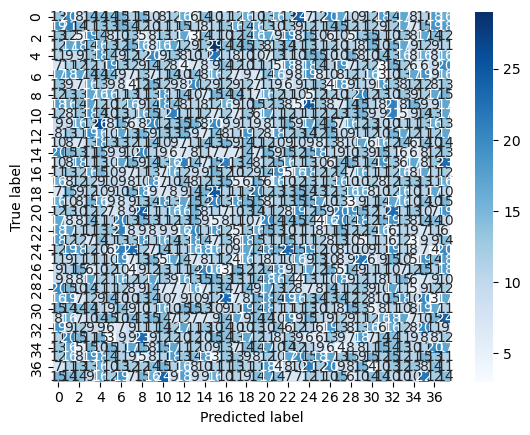

In [14]:
# predictions = model.predict(test_generator)
# predicted_labels = np.argmax(predictions, axis=1)
# true_labels = test_generator.classes
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(true_labels, predicted_labels)
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()

# Classification report

The SkLearn Metrics Library has an inbuilt Classification Report. It lists important evaluation metrics such as F1-Score, Accuracy, Recall And Precision.

In [15]:
# predictions = model.predict(test_generator)
# predicted_labels = np.argmax(predictions, axis=1)
# true_labels = test_generator.classes
# from sklearn.metrics import classification_report

# report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
# print(report)

550/550 [==============================] - 33s 60ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.04      0.04      0.04       504
                                 Apple___Black_rot       0.03      0.03      0.03       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.02      0.02      0.02       502
                               Blueberry___healthy       0.02      0.03      0.02       454
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       421
                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.02      0.03      0.03       477
               Corn_(m

The model has been trained and the weights and biases for the same were downloaded.

In [18]:
#Loading Saved Model
from keras.models import load_model
model = load_model('C:/Users/abhyu/Documents/TF/resnet50/main_model.h5')


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Predicting 

In [20]:
#Function For Prediction 
def predict_disease(test_image): 
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (128, 128))
  img = img.reshape(1,128, 128,3)
  prediction = model.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [21]:
#List Of Classes
Plant_disease = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']


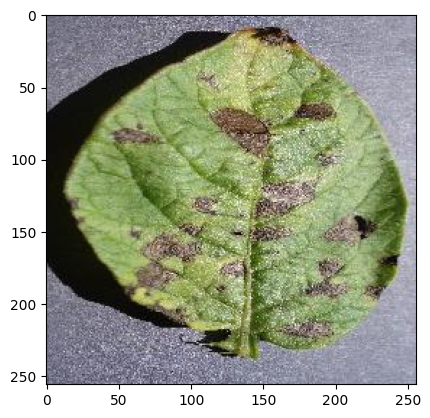

1/1 [==============================] - 0s 132ms/step


'Potato___Early_blight'

In [25]:
#Invoking Prediction Function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'C:/Users/abhyu/Documents/TF/dataset/test/test/PotatoEarlyBlight2.JPG'
img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

pred=predict_disease(img_path)
d=pred[0]
Plant_disease[d]